# cadCAD Experiment

In [1]:
import matplotlib.pyplot as plt
from model.run import run

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 12, 1, 5)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
system_expected_revenue=3, epsilon=-0.9585137104827555
delegator_expected_revenue=0.1244588685517336
act: acting_delegator_ids=[]
system_expected_revenue=3, epsilon=-0.22585676611637068
delegator_expected_revenue=2.322429701650888
act: acting_delegator_ids=[]
system_expected_revenue=3, epsilon=-0.38704517169811287
delegator_expected_revenue=1.8388644849056612
act: acting_delegator_ids=[2]
act: delegator.shares=0
dividend_value: self.id=2, supply=10, self.expected_revenue=1.8388644849056612, revenue_per_period_per_share=0.1379148

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each broker eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [2]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_revenue_token_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_revenue_token_holdings:
            delegator_revenue_token_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_revenue_token_holdings[delegator_id][timestep] = delegator.revenue_token_holdings
        delegator_shares[delegator_id][timestep] = delegator.shares
        
    timestep += 1

# Shares broken down by Delgator

Text(0, 0.5, 'Delegator Shares')

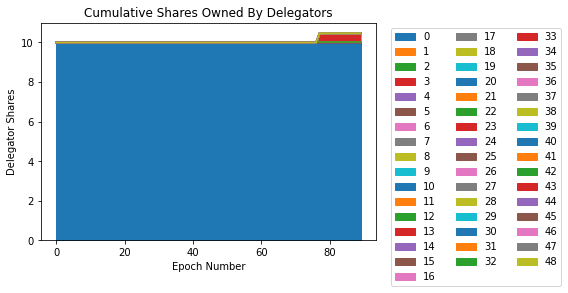

In [3]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

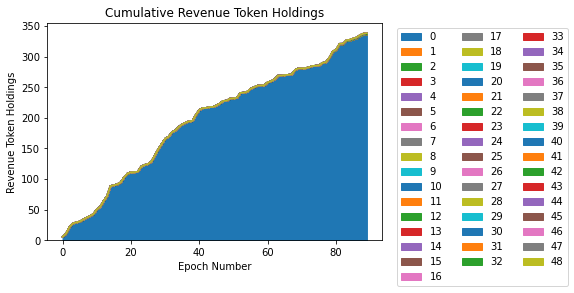

In [4]:
df_plot = pd.DataFrame(delegator_revenue_token_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')